In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Input parameters
START_PRICE  = 3000    # Starting price
STEP_PRICE   = 3000     # Price to increase in each row
END_PRICE    = 100000  # Price at the end of the table
ORDERS       = 20      #

In [3]:
def thai_withholding_tax(price):
    return price*0.03

In [4]:
def fastwork_commission(price):
    # Tier 1
    tier1 = min(price,10000) * 0.17
    # Tier 2
    tier2 = min(max(0,price-10000) * 0.12,4800)
    # Tier 3
    tier3 = max(0,price-50000) * 0.07
    
    return tier1+tier2+tier3

In [5]:
def total_cost(price):
    return thai_withholding_tax(price) + fastwork_commission(price)

In [6]:
price_matrix = [[i,j] for i in range(START_PRICE,END_PRICE,STEP_PRICE) for j in range(1,ORDERS)]

In [7]:
# print(price_matrix)

In [8]:
df = pd.DataFrame(price_matrix, columns=['Price','Orders'])

In [9]:
# df['Fastwork_Fee'] = df['Price'].apply(fastwork_commission)

In [10]:
# df['Tax'] = df['Price'].apply(thai_withholding_tax)

In [11]:
df['Total_Price'] = df['Price'] * df['Orders']

In [12]:
df['Cost'] = df['Price'].apply(total_cost) * df['Orders']

In [13]:
df['Cost%'] = (df['Cost']/df['Total_Price'])

In [14]:
df_pivot = pd.pivot_table(df,values='Cost%',index=['Price'],columns=['Orders'])

In [15]:
print(df_pivot)

Orders        1         2         3         4         5         6         7   \
Price                                                                          
3000    0.200000  0.200000  0.200000  0.200000  0.200000  0.200000  0.200000   
6000    0.200000  0.200000  0.200000  0.200000  0.200000  0.200000  0.200000   
9000    0.200000  0.200000  0.200000  0.200000  0.200000  0.200000  0.200000   
12000   0.191667  0.191667  0.191667  0.191667  0.191667  0.191667  0.191667   
15000   0.183333  0.183333  0.183333  0.183333  0.183333  0.183333  0.183333   
18000   0.177778  0.177778  0.177778  0.177778  0.177778  0.177778  0.177778   
21000   0.173810  0.173810  0.173810  0.173810  0.173810  0.173810  0.173810   
24000   0.170833  0.170833  0.170833  0.170833  0.170833  0.170833  0.170833   
27000   0.168519  0.168519  0.168519  0.168519  0.168519  0.168519  0.168519   
30000   0.166667  0.166667  0.166667  0.166667  0.166667  0.166667  0.166667   
33000   0.165152  0.165152  0.165152  0.

<AxesSubplot: xlabel='Orders', ylabel='Price'>

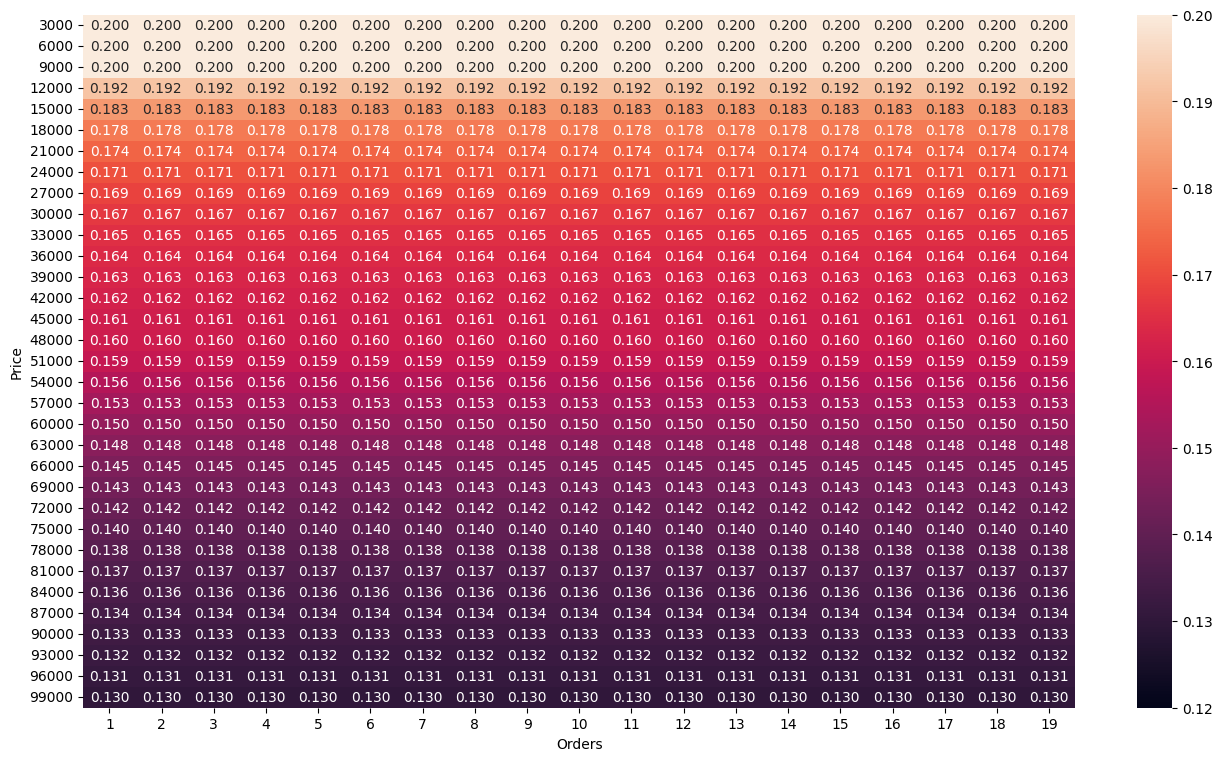

In [21]:
plt.figure(figsize=(16, 9))
sns.heatmap(df_pivot,vmin=0.12,vmax=0.2,annot=True,fmt=".3f")